# Import Library

In [63]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

# Train and Test Directory

In [52]:
train_dir = "./EmotionsDataset/train/"
test_dir = "./EmotionsDataset/test/"

In [53]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical'
)

Found 6799 images belonging to 3 classes.
Found 2278 images belonging to 3 classes.


# Visulation

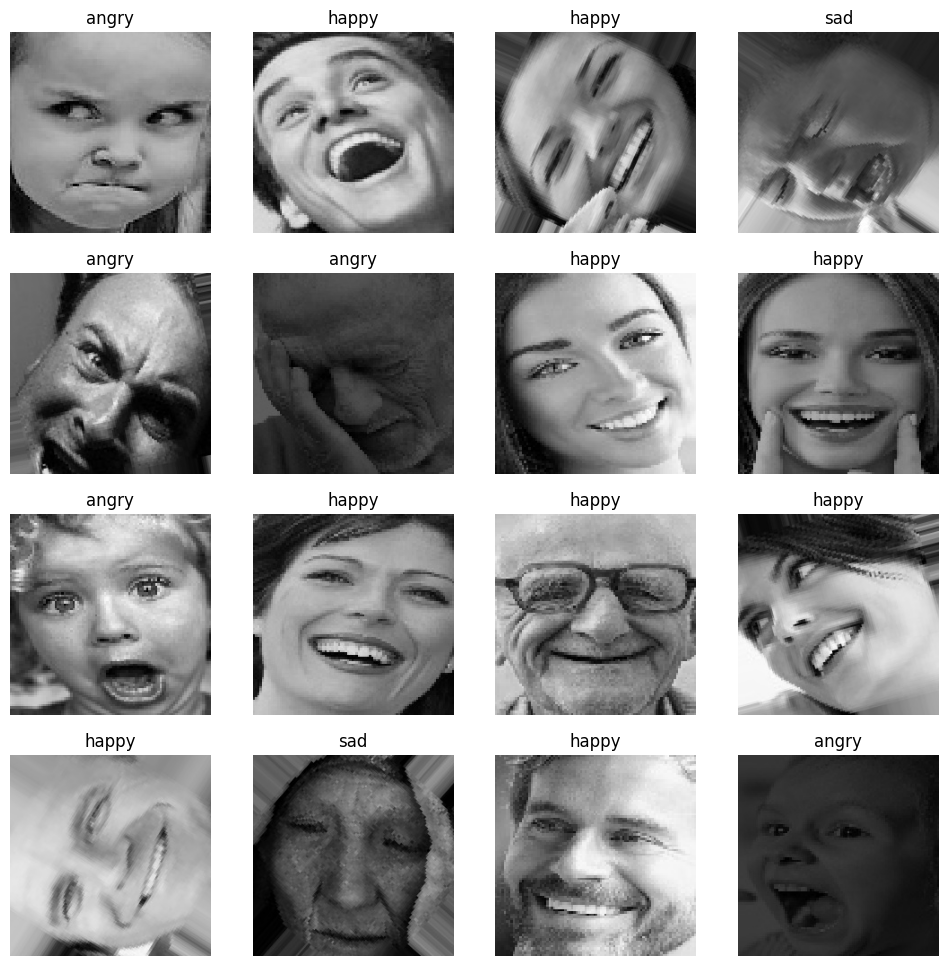

In [55]:
images, labels = next(train_generator)

# Define the number of images to display
num_images = 16

# Create a figure with subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()
class_labels = {v: k for k, v in train_generator.class_indices.items()}

for i in range(num_images):
    img = images[i]
    label_index = np.argmax(labels[i])  
    label = class_labels[label_index]
    img = np.clip(img, 0, 1) 
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off') 

# Show the plot
plt.show()

# Custom Model

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1),input_shape=(224,224,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3),(1,1),activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64,(3,3),(1,1),activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),(1,1),activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

          
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 64)      36928     
                                                      

# Model Compile

In [58]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# Model Fit

In [59]:
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
425/425 [==============================] - 28s 65ms/step - loss: 1.0832 - accuracy: 0.4424 - categorical_accuracy: 0.4424 - precision_9: 0.4951 - recall_9: 0.0299 - val_loss: 1.0637 - val_accuracy: 0.4416 - val_categorical_accuracy: 0.4416 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/10
425/425 [==============================] - 27s 63ms/step - loss: 1.0606 - accuracy: 0.4492 - categorical_accuracy: 0.4492 - precision_9: 0.5000 - recall_9: 0.0049 - val_loss: 1.0185 - val_accuracy: 0.4965 - val_categorical_accuracy: 0.4965 - val_precision_9: 0.5592 - val_recall_9: 0.0830
Epoch 3/10
425/425 [==============================] - 27s 63ms/step - loss: 0.9110 - accuracy: 0.5768 - categorical_accuracy: 0.5768 - precision_9: 0.6639 - recall_9: 0.3861 - val_loss: 0.8064 - val_accuracy: 0.6510 - val_categorical_accuracy: 0.6510 - val_precision_9: 0.7184 - val_recall_9: 0.5285
Epoch 4/10
425/425 [==============================] - 28s 65ms/step - loss: 0.6239 - accurac

# Loss Graph

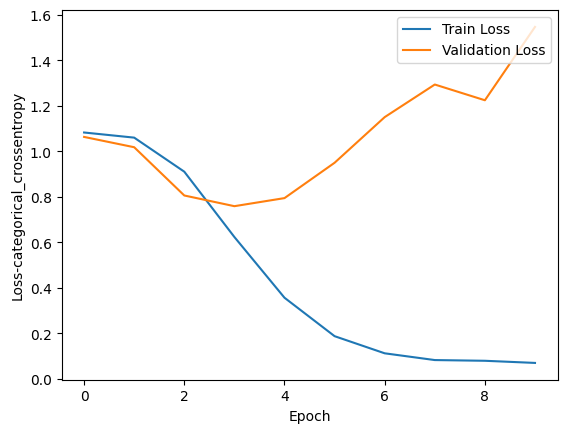

In [60]:
plt.plot(history.history['loss'],label ='Train Loss')
plt.plot(history.history['val_loss'],label ='Validation Loss')
plt.ylabel('Loss-categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Accuracy Graph

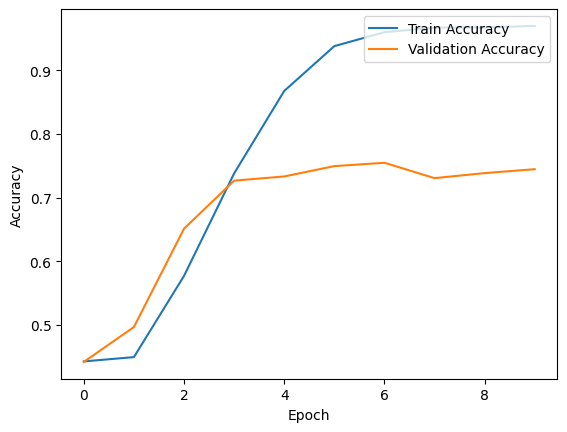

In [61]:
plt.plot(history.history['accuracy'],label ='Train Accuracy')
plt.plot(history.history['val_accuracy'],label ='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Model Test

In [62]:
model.evaluate(test_generator)

143/143 [==============================] - 4s 30ms/step - loss: 1.5472 - accuracy: 0.7445 - categorical_accuracy: 0.7445 - precision_9: 0.7520 - recall_9: 0.7362


[1.5472110509872437,
 0.7445127367973328,
 0.7445127367973328,
 0.7520179152488708,
 0.736172080039978]

# Model Save

In [64]:
model.save("emotionmodel.h5")

# Model Predict

1/1 [==============================] - 0s 94ms/step


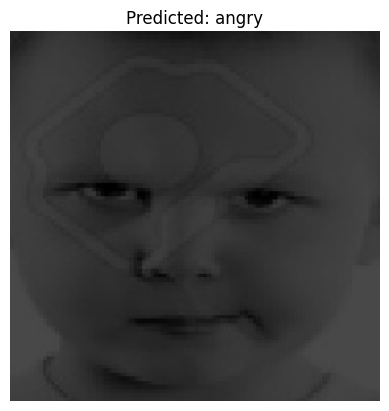

In [70]:
model = tf.keras.models.load_model('emotionmodel.h5') 

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size) 
    img_array = image.img_to_array(img) 
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array


img_path = './EmotionsDataset/test/angry/151739.jpg_brightness_2.jpg'  

img_array = load_and_preprocess_image(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0] 

class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())  


def display_image_with_prediction(img_path, predicted_class, class_labels):
    img = image.load_img(img_path)  
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

display_image_with_prediction(img_path, predicted_class, class_labels)

In [71]:
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())  
print(class_labels)

['angry', 'happy', 'sad']


# Transfer Learning

In [47]:
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

In [50]:
history = model.fit(
    train_generator,
    batch_size=2,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
  4/425 [..............................] - ETA: 1:28 - loss: 1.2907 - accuracy: 0.4062 - categorical_accuracy: 0.4062 - precision_8: 0.3750 - recall_8: 0.0938

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_8/xception/block14_sepconv2_bn/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\Enes\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Enes\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Enes\AppData\Local\Temp\ipykernel_17904\2152320811.py", line 1, in <module>
      history = model.fit(
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_8/xception/block14_sepconv2_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_8/xception/block14_sepconv2_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_198624]